# Sleep Optimization Using Fuzzy Logic

Sleep quality is essential for overall health and well-being, affecting everything from physical performance and mental clarity to mood and immune function. Traditional sleep optimization methods often rely on fixed guidelines, such as the recommended 7-9 hours of sleep per night, but these may not address individual needs, lifestyle factors, or daily variations in energy requirements.

In this notebook, we leverage fuzzy logic to develop a flexible and personalized approach to sleep optimization. Fuzzy logic allows us to handle the uncertainties and nuances associated with human sleep needs. By using this system, users can input factors such as stress level, physical activity, and current sleep quality, receiving personalized suggestions for optimal sleep duration and environment settings.

# Sleep quality controller 

The Sleep Quality Controller assesses your overall sleep quality based on various personal factors, including stress levels, physical activity, and recent sleep patterns. Using fuzzy logic, this controller interprets subjective inputs to gauge how well you are sleeping, providing a nuanced assessment that reflects your current lifestyle and needs.

With this tool, you can better understand the quality of your sleep and identify areas that might need improvement, helping you make informed decisions to enhance your rest and well-being.


In [258]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Defining the Antecedents for each input factor
rhythm = ctrl.Antecedent(np.arange(0, 11, 1), 'rhythm')
stress = ctrl.Antecedent(np.arange(0, 11, 1), 'stress')
duration = ctrl.Antecedent(np.arange(0, 11, 1), 'duration')
environment = ctrl.Antecedent(np.arange(0, 11, 1), 'environment')

# Defining the Consequent for sleep quality
sleep_quality = ctrl.Consequent(np.arange(0, 11, 1), 'sleep_quality')

# Auto-populate membership functions for antecedents (5 levels: poor, mediocre, average, decent, good)
rhythm.automf(5)
stress.automf(5, invert=True)
duration['very short'] = fuzz.trapmf(sleep_quality.universe, [0, 0, 1.5, 3])
duration['short'] = fuzz.trimf(sleep_quality.universe, [1.5, 3, 5])
duration['average'] = fuzz.trapmf(sleep_quality.universe, [3, 5, 7, 8])
duration['long'] = fuzz.trimf(sleep_quality.universe, [7, 10, 10])
environment.automf(5)

# Custom membership functions for the consequent (sleep quality) with 5 levels
sleep_quality['poor'] = fuzz.trimf(sleep_quality.universe, [0, 0, 2.5])
sleep_quality['mediocre'] = fuzz.trimf(sleep_quality.universe, [0, 2.5, 5])
sleep_quality['average'] = fuzz.trimf(sleep_quality.universe, [2.5, 5, 7.5])
sleep_quality['decent'] = fuzz.trimf(sleep_quality.universe, [5, 7.5, 10])
sleep_quality['good'] = fuzz.trimf(sleep_quality.universe, [7.5, 10, 10])


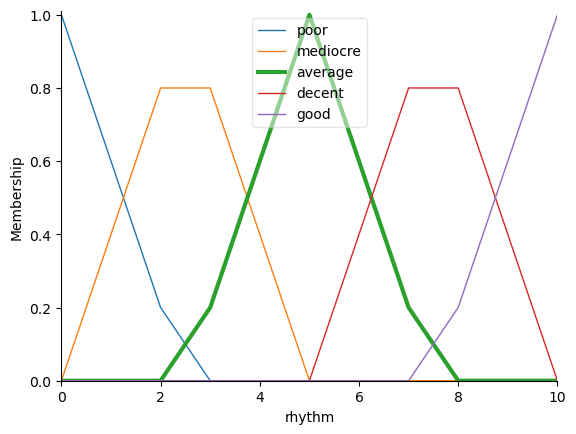

In [259]:
rhythm['average'].view()


# Fuzzy Rules

To make our fuzzy inputs meaningful, we define relationships between the selected input factors (**Rhythm**, **Stress**, **Duration**, and **Environment**) and the output variable, **Sleep Quality**. For our sleep quality model, consider these sample fuzzy rules:

- **If stress is high OR environment is poor, then sleep quality will be poor.**
- **If duration is average and rhythm is decent, then sleep quality will be average.**
- **If rhythm is good AND duration is good, then sleep quality will be high.**

These rules capture common-sense insights about factors affecting sleep quality. However, they are inherently imprecise, with terms like "high," "average," or "good" representing subjective evaluations. Mapping these nuanced, "fuzzy" relationships into a clear sleep quality assessment can be complex. This is where fuzzy logic excels, providing a flexible framework to translate these rules into actionable insights about sleep quality.




(<Figure size 640x480 with 1 Axes>, <Axes: >)

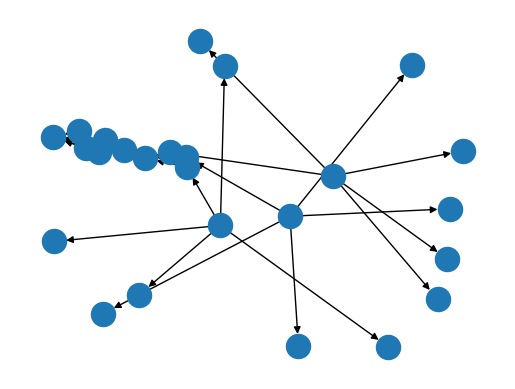

In [260]:
import skfuzzy.control as ctrl

# Rules focusing on poor sleep quality
rule1 = ctrl.Rule(stress['poor'] | environment['poor'] | rhythm['poor'], sleep_quality['poor'])
rule2 = ctrl.Rule(duration['very short'] & stress['poor'], sleep_quality['poor'])
rule3 = ctrl.Rule(environment['poor'] & rhythm['mediocre'], sleep_quality['poor'])

# Rules with mediocre sleep quality
rule4 = ctrl.Rule(stress['mediocre'] | environment['mediocre'] | duration['short'], sleep_quality['mediocre'])
rule5 = ctrl.Rule(rhythm['mediocre'] & duration['short'], sleep_quality['mediocre'])
rule6 = ctrl.Rule(environment['mediocre'] & (stress['poor'] | rhythm['poor']), sleep_quality['mediocre'])

# Rules for average sleep quality
rule7 = ctrl.Rule(stress['average'] & duration['average'], sleep_quality['average'])
rule8 = ctrl.Rule(rhythm['average'] & environment['average'], sleep_quality['average'])
rule9 = ctrl.Rule(duration['average'] & rhythm['decent'], sleep_quality['average'])
rule10 = ctrl.Rule(environment['average'] & (stress['average'] | duration['average']), sleep_quality['average'])

# Rules for decent sleep quality
rule11 = ctrl.Rule((stress['decent'] | duration['long']) & (environment['average'] | rhythm['decent']), sleep_quality['decent'])
rule12 = ctrl.Rule(duration['long'] & rhythm['good'], sleep_quality['decent'])
rule13 = ctrl.Rule(stress['decent'] & environment['decent'], sleep_quality['decent'])

# Rules focusing on good sleep quality
rule14 = ctrl.Rule(rhythm['good'] & duration['long'] & stress['good'], sleep_quality['good'])
rule15 = ctrl.Rule(environment['good'] & rhythm['good'], sleep_quality['good'])
rule16 = ctrl.Rule(stress['decent'] & duration['long'] & environment['good'], sleep_quality['good'])
rule17 = ctrl.Rule(duration['long'] & environment['good'], sleep_quality['good'])

# Additional rules to cover beneficial combinations
rule18 = ctrl.Rule(stress['decent'] & rhythm['good'], sleep_quality['good'])
rule19 = ctrl.Rule(duration['long'] | rhythm['good'] & environment['good'], sleep_quality['good'])

# Visualization of one of the rules as an example
rule1.view()


# Control System Creation 

Now that we have our rules defined, we can simply create a control system via:

In [262]:
sleep_quality_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19
])


In [263]:
sleep_quality_simulation = ctrl.ControlSystemSimulation(sleep_quality_ctrl)


In [222]:
# Prompting the user to enter scores for each input factor
sleep_quality_simulation.input['rhythm'] = float(input("Enter a score for Rhythm (0-10): "))
sleep_quality_simulation.input['duration'] = float(input("Enter a score for Duration (0-10): "))
sleep_quality_simulation.input['stress'] = float(input("Enter a score for Stress (0-10): "))
sleep_quality_simulation.input['environment'] = float(input("Enter a score for Environment (0-10): "))

# Compute the sleep quality based on the inputs
sleep_quality_simulation.compute()

# Once computed, display the result as well as visualize it.
print(f"Predicted Sleep Quality:, {sleep_quality_simulation.output['sleep_quality']: .1f}")
sleep_quality.view(sim=sleep_quality_simulation)



ValueError: could not convert string to float: ''

Papa

In [264]:
# Middle aged man
input_data = [
    {"rhythm": 8, "duration": 9, "stress": 2, "environment": 10},
    {"rhythm": 8, "duration": 7, "stress": 3, "environment": 5},
    {"rhythm": 7, "duration": 6, "stress": 1, "environment": 8},
    {"rhythm": 8, "duration": 5, "stress": 3, "environment": 9},
    {"rhythm": 10, "duration": 8, "stress": 2, "environment": 10},
    {"rhythm": 8, "duration": 8, "stress": 1, "environment": 10},
]

# Simulation of sleep quality using the input data
for entry in input_data:
    sleep_quality_simulation.input['rhythm'] = entry["rhythm"]
    sleep_quality_simulation.input['duration'] = entry["duration"]
    sleep_quality_simulation.input['stress'] = entry["stress"]
    sleep_quality_simulation.input['environment'] = entry["environment"]
    
    # Compute the sleep quality
    sleep_quality_simulation.compute()
    
    # Print and visualize the result
    print(f"Predicted Sleep Quality: {sleep_quality_simulation.output['sleep_quality']: .1f}")


Predicted Sleep Quality:  7.9
Predicted Sleep Quality:  6.3
Predicted Sleep Quality:  5.9
Predicted Sleep Quality:  6.3
Predicted Sleep Quality:  8.2
Predicted Sleep Quality:  7.7


In [274]:
# Simulation of sleep quality using the input data
for entry in input_data:
    sleep_quality_simulation.input['rhythm'] = entry["rhythm"]
    sleep_quality_simulation.input['duration'] = entry["duration"]
    sleep_quality_simulation.input['stress'] = entry["stress"]
    sleep_quality_simulation.input['environment'] = entry["environment"]
    
    # Compute the sleep quality
    sleep_quality_simulation.compute()
    
    # Print and visualize the result
    print(f"Predicted Sleep Quality: {sleep_quality_simulation.output['sleep_quality']: .1f}")

Predicted Sleep Quality:  3.7
Predicted Sleep Quality:  6.2
Predicted Sleep Quality:  6.0
Predicted Sleep Quality:  6.3
Predicted Sleep Quality:  3.7
Predicted Sleep Quality:  7.0


In [267]:
input_data = [ # Student 1
    {"rhythm": 5, "duration": 8, "stress": 9, "environment": 6},
    {"rhythm": 8, "duration": 9, "stress": 3, "environment": 7},
    {"rhythm": 6, "duration": 8, "stress": 4, "environment": 9},
    {"rhythm": 6, "duration": 8, "stress": 5, "environment": 7},
    {"rhythm": 8, "duration": 7, "stress": 3, "environment": 7},
    {"rhythm": 8, "duration": 5, "stress": 2, "environment": 4},
]


In [269]:
input_data = [ # Student 2
    {"rhythm": 3, "duration": 7, "stress": 5, "environment": 8},
    {"rhythm": 6, "duration": 6, "stress": 2, "environment": 8},
    {"rhythm": 8, "duration": 6, "stress": 3, "environment": 8},
    {"rhythm": 9, "duration": 8, "stress": 6, "environment": 8},
    {"rhythm": 8, "duration": 7, "stress": 2, "environment": 9},
    {"rhythm": 7, "duration": 5, "stress": 4, "environment": 7},
]

In [271]:
input_data = [ # Student 3
    {"rhythm": 7, "duration": 5, "stress": 8, "environment": 4},
    {"rhythm": 4, "duration": 6, "stress": 1.5, "environment": 6},
    {"rhythm": 5.5, "duration": 7, "stress": 4, "environment": 6},
    {"rhythm": 8, "duration": 7, "stress": 3, "environment": 7},
    {"rhythm": 6, "duration": 6, "stress": 7, "environment": 6},
    {"rhythm": 7, "duration": 8, "stress": 2, "environment": 6},
]


In [265]:
input_data = [ # Middle aged woman
    {"rhythm": 9, "duration": 10, "stress": 5, "environment": 9},
    {"rhythm": 8, "duration": 8, "stress": 3, "environment": 9},
    {"rhythm": 7, "duration": 10, "stress": 2, "environment": 10},
    {"rhythm": 10, "duration": 9, "stress": 4, "environment": 10},
    {"rhythm": 9, "duration": 10, "stress": 2, "environment": 10},
    {"rhythm": 9, "duration": 10, "stress": 2, "environment": 9},
]

In [273]:
inputs = [ # Student 4
    {"rhythm": 2, "stress": 7, "duration": 6, "environment": 9},
    {"rhythm": 8, "stress": 8, "duration": 3, "environment": 4},
    {"rhythm": 8, "stress": 9, "duration": 7, "environment": 5},
    {"rhythm": 8, "stress": 7, "duration": 7, "environment": 8},
    {"rhythm": 9, "stress": 8, "duration": 8, "environment": 9},
    {"rhythm": 7, "stress": 10, "duration": 8, "environment": 8}
]

Check if prediction and actual values are matching

In [21]:
# (y_hat, y) = (prediction, actual) Student 1
student1 = np.array([
    [4.60, 6.00],
    [7.20, 7.00],
    [7.70, 8.00],
    [6.70, 7.00],
    [6.30, 7.00],
    [5.50, 5.00]
])
student2 = np.array([
    [5.00, 6],
    [6.50, 7],
    [6.30, 7],
    [5.00, 7],
    [6.30, 8],
    [5.90, 6]
])
student3 = np.array([
    [3.70, 4],
    [6.20, 4],
    [6.00, 5.50],
    [6.30, 8],
    [3.70, 5],
    [8.00, 7]
])
student4 = np.array([
    [3.70, 5],
    [6.20, 5],
    [6.00, 6],
    [6.30, 7],
    [3.70, 5],
    [7.00, 9]
])
middle_aged_man = np.array([
    [7.90, 8],
    [6.30, 6],
    [5.90, 7.90],
    [6.30, 7],
    [8.20, 8],
    [7.70, 8]
])
middle_aged_women = np.array([
    [8.00, 9],
    [7.60, 8],
    [7.90, 9],
    [8.00, 9],
    [8.00, 10],
    [8.00, 9]
])

data = np.vstack((student1, student2, student3, student4, middle_aged_man, middle_aged_women))
data = np.array([[5,5.5]])

# Separate the columns for clarity
y_values = data[:, 0]
y_hat_values = data[:, 1]


In [22]:
def calculate_membership_degrees(x_value):
    degrees = {}
    for label, term in sleep_quality.terms.items():
        mf = term.mf  # Get the membership function array
        degree = fuzz.interp_membership(sleep_quality.universe, mf, x_value)
        degrees[label] = degree
    return degrees

def calculate_overlap_percentage(actual_degrees, predicted_degrees):
    labels = actual_degrees.keys()
    overlap_sum = 0
    total_sum = 0
    for label in labels:
        min_degree = min(actual_degrees[label], predicted_degrees[label])
        max_degree = max(actual_degrees[label], predicted_degrees[label])
        overlap_sum += min_degree
        total_sum += max_degree
    if total_sum == 0:
        return 0
    overlap_percentage = (overlap_sum / total_sum) * 100
    return overlap_percentage


# Calculate membership degrees for all y and y_hat values
results = []

for y, y_hat in zip(y_values, y_hat_values):
    y_degrees = calculate_membership_degrees(y)
    y_hat_degrees = calculate_membership_degrees(y_hat)
    results.append({
        'y': y,
        'y_hat': y_hat,
        'y_degrees': y_degrees,
        'y_hat_degrees': y_hat_degrees
    })

In [24]:
overlap_list = []
for idx, result in enumerate(results):
    y = result['y']
    y_hat = result['y_hat']
    y_degrees = result['y_degrees']
    y_hat_degrees = result['y_hat_degrees']
    overlap_percentage = calculate_overlap_percentage(y_degrees, y_hat_degrees)
    print(f"Data Point {idx+1}:")
    print(y_degrees)
    print(y_hat_degrees)
    print(f"  Overlap Percentage: {overlap_percentage:.2f}%\n")
    overlap_list.append(overlap_percentage)
print(f"Average Overlap Percentage: {np.mean(overlap_list):.2f}%")


Data Point 1:
{'poor': 0.0, 'mediocre': 0.0, 'average': 1.0, 'decent': 0.0, 'good': 0.0}
{'poor': 0.0, 'mediocre': 0.0, 'average': 0.8, 'decent': 0.2, 'good': 0.0}
  Overlap Percentage: 66.67%

Average Overlap Percentage: 66.67%
